**DATA PREPROCESSING**

In [326]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [327]:
career = pd.read_csv('career_change_prediction_dataset.csv')
career.head(10)

,Field of Study,Current Occupation,Age,Gender,Years of Experience,Education Level,Industry Growth Rate,Job Satisfaction,Work-Life Balance,Job Opportunities,...,Skills Gap,Family Influence,Mentorship Available,Certifications,Freelancing Experience,Geographic Mobility,Professional Networks,Career Change Events,Technology Adoption,Likely to Change Occupation
0,Medicine,Business Analyst,48,Male,7,High School,High,7,10,83,...,8,High,0,0,0,1,2,0,1,0
1,Education,Economist,44,Male,26,Master's,Low,10,3,55,...,3,Medium,0,0,1,1,2,1,9,0
2,Education,Biologist,21,Female,27,Master's,Low,8,3,78,...,4,Low,0,0,0,0,2,1,2,0
3,Education,Business Analyst,33,Male,14,PhD,Medium,7,9,62,...,2,Medium,1,0,0,0,9,0,1,0
4,Arts,Doctor,28,Female,0,PhD,Low,3,1,8,...,5,Low,0,0,1,0,2,0,7,1
5,Medicine,Lawyer,56,Male,39,Bachelor's,Low,3,1,99,...,10,Medium,1,0,0,0,10,0,3,1
6,Medicine,Software Developer,51,Female,29,High School,Low,7,4,13,...,6,High,1,1,0,1,4,1,10,0
7,Medicine,Artist,58,Female,32,High School,High,9,4,77,...,8,Medium,0,0,0,0,6,0,4,0
8,Computer Science,Software Developer,31,Female,38,Bachelor's,Low,1,5,56,...,6,Medium,0,1,0,0,10,1,7,1
9,Business,Doctor,30,Female,16,Master's,Medium,8,5,98,...,6,High,0,0,0,0,3,2,3,0


In [328]:
career['Education Level'].unique()

array(['High School', "Master's", 'PhD', "Bachelor's"], dtype=object)

In [329]:
career.shape

(38444, 23)

In [330]:
career_without_missing_values= career.isnull().sum()
career_without_missing_values

,0
Field of Study,0
Current Occupation,0
Age,0
Gender,0
Years of Experience,0
Education Level,0
Industry Growth Rate,0
Job Satisfaction,0
Work-Life Balance,0
Job Opportunities,0


**ADDING NULL VALUES IN THE DATASET**

In [331]:
for i in range(2300, 2700):
  career.loc[i, 'Field of Study'] = None

In [332]:
# Adding missing values randomly in Age column
for i in range(50):
  row = random.randint(0,38443)
  career.loc[row, 'Age'] = None

In [333]:
career_after_missing_values= career.isnull().sum()
career_after_missing_values

,0
Field of Study,400
Current Occupation,0
Age,50
Gender,0
Years of Experience,0
Education Level,0
Industry Growth Rate,0
Job Satisfaction,0
Work-Life Balance,0
Job Opportunities,0


**Dropping Rows**

In [334]:
print("Number of rows with null values in Family Influence column: ", career['Family Influence'].isnull().sum())
career_subset = career[career['Family Influence'].notnull()]
print("Shape after removing null values: ", career_subset.shape)

Number of rows with null values in Family Influence column:  9632
Shape after removing null values:  (28812, 23)


In [335]:
print("Shape of dataframe before dropping:", career.shape)
career = career.dropna(axis =0, subset = ['Family Influence'])
print("Shape after dropping:", career.shape)


Shape of dataframe before dropping: (38444, 23)
Shape after dropping: (28812, 23)


In [336]:
print("Shape of dataframe before dropping:", career.shape)
career = career.dropna(axis =0, subset = ['Field of Study'])
print("Shape after dropping:", career.shape)

Shape of dataframe before dropping: (28812, 23)
Shape after dropping: (28519, 23)


In [337]:
career.isnull().sum()

,0
Field of Study,0
Current Occupation,0
Age,39
Gender,0
Years of Experience,0
Education Level,0
Industry Growth Rate,0
Job Satisfaction,0
Work-Life Balance,0
Job Opportunities,0


In [338]:
from sklearn.impute import SimpleImputer

impute = SimpleImputer(missing_values=np.nan, strategy='mean')

impute.fit(career[['Age']])

career[['Age']] = impute.transform(career[['Age']])

In [339]:
career['Age']

,Age
0,48.00000
1,44.00000
2,21.00000
3,33.00000
4,28.00000
...,...
38438,55.00000
38439,39.54698
38440,21.00000
38442,35.00000


In [340]:
career.isnull().sum()

,0
Field of Study,0
Current Occupation,0
Age,0
Gender,0
Years of Experience,0
Education Level,0
Industry Growth Rate,0
Job Satisfaction,0
Work-Life Balance,0
Job Opportunities,0


In [341]:
career.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28519 entries, 0 to 38443
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Field of Study               28519 non-null  object 
 1   Current Occupation           28519 non-null  object 
 2   Age                          28519 non-null  float64
 3   Gender                       28519 non-null  object 
 4   Years of Experience          28519 non-null  int64  
 5   Education Level              28519 non-null  object 
 6   Industry Growth Rate         28519 non-null  object 
 7   Job Satisfaction             28519 non-null  int64  
 8   Work-Life Balance            28519 non-null  int64  
 9   Job Opportunities            28519 non-null  int64  
 10  Salary                       28519 non-null  int64  
 11  Job Security                 28519 non-null  int64  
 12  Career Change Interest       28519 non-null  int64  
 13  Skills Gap           

In [342]:
# Apply the encoding to the "Industry Growth Rate" column
career['Industry Growth Rate'] = career['Industry Growth Rate'].map({'High':2,'Medium':1,'Low':0})
career['Family Influence'] = career['Family Influence'].map({'High':2,'Medium':1,'Low':0})
career['Education Level'] = career['Education Level'].map({'PhD' :3, "Master's" :2 ,"Bachelor's":1, "High School":0})

In [343]:
from sklearn.preprocessing import LabelEncoder

# Set up the LabelEncoder object
enc = LabelEncoder()

# Apply the encoding to the "Gender" column
career['Gender_enc'] = enc.fit_transform(career['Gender'])

# Compare the two columns
print(career[['Gender', 'Gender_enc']].head())

   Gender  Gender_enc
0    Male           1
1    Male           1
2  Female           0
3    Male           1
4  Female           0


In [344]:
career.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28519 entries, 0 to 38443
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Field of Study               28519 non-null  object 
 1   Current Occupation           28519 non-null  object 
 2   Age                          28519 non-null  float64
 3   Gender                       28519 non-null  object 
 4   Years of Experience          28519 non-null  int64  
 5   Education Level              28519 non-null  int64  
 6   Industry Growth Rate         28519 non-null  int64  
 7   Job Satisfaction             28519 non-null  int64  
 8   Work-Life Balance            28519 non-null  int64  
 9   Job Opportunities            28519 non-null  int64  
 10  Salary                       28519 non-null  int64  
 11  Job Security                 28519 non-null  int64  
 12  Career Change Interest       28519 non-null  int64  
 13  Skills Gap           

In [345]:
career['Field of Study'].unique()

array(['Medicine', 'Education', 'Arts', 'Computer Science', 'Business',
       'Mechanical Engineering', 'Biology', 'Law', 'Economics',
       'Psychology'], dtype=object)

In [346]:
# Transform the Field of Study column
Field_of_Study_enc = pd.get_dummies(career['Field of Study'])
career = pd.concat([career, Field_of_Study_enc], axis=1)
# Take a look at the encoded columns
career.head()


,Field of Study,Current Occupation,Age,Gender,Years of Experience,Education Level,Industry Growth Rate,Job Satisfaction,Work-Life Balance,Job Opportunities,...,Arts,Biology,Business,Computer Science,Economics,Education,Law,Mechanical Engineering,Medicine,Psychology
0,Medicine,Business Analyst,48.0,Male,7,0,2,7,10,83,...,False,False,False,False,False,False,False,False,True,False
1,Education,Economist,44.0,Male,26,2,0,10,3,55,...,False,False,False,False,False,True,False,False,False,False
2,Education,Biologist,21.0,Female,27,2,0,8,3,78,...,False,False,False,False,False,True,False,False,False,False
3,Education,Business Analyst,33.0,Male,14,3,1,7,9,62,...,False,False,False,False,False,True,False,False,False,False
4,Arts,Doctor,28.0,Female,0,3,0,3,1,8,...,True,False,False,False,False,False,False,False,False,False


In [347]:
career['Field of Study'].head()

,Field of Study
0,Medicine
1,Education
2,Education
3,Education
4,Arts


In [348]:
career['Current Occupation'].unique()

array(['Business Analyst', 'Economist', 'Biologist', 'Doctor', 'Lawyer',
       'Software Developer', 'Artist', 'Psychologist', 'Teacher',
       'Mechanical Engineer'], dtype=object)

In [349]:
# Transform the Current Occupation column
Current_Occupation_enc = pd.get_dummies(career['Current Occupation'])
career = pd.concat([career, Current_Occupation_enc], axis=1)
# Take a look at the encoded columns
Current_Occupation_enc.head()

,Artist,Biologist,Business Analyst,Doctor,Economist,Lawyer,Mechanical Engineer,Psychologist,Software Developer,Teacher
0,False,False,True,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False


In [350]:
career.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28519 entries, 0 to 38443
Data columns (total 44 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Field of Study               28519 non-null  object 
 1   Current Occupation           28519 non-null  object 
 2   Age                          28519 non-null  float64
 3   Gender                       28519 non-null  object 
 4   Years of Experience          28519 non-null  int64  
 5   Education Level              28519 non-null  int64  
 6   Industry Growth Rate         28519 non-null  int64  
 7   Job Satisfaction             28519 non-null  int64  
 8   Work-Life Balance            28519 non-null  int64  
 9   Job Opportunities            28519 non-null  int64  
 10  Salary                       28519 non-null  int64  
 11  Job Security                 28519 non-null  int64  
 12  Career Change Interest       28519 non-null  int64  
 13  Skills Gap           

In [351]:
career = career.drop(['Field of Study', 'Current Occupation', 'Gender'], axis = 1)
career.shape

(28519, 41)

In [352]:
career.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28519 entries, 0 to 38443
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          28519 non-null  float64
 1   Years of Experience          28519 non-null  int64  
 2   Education Level              28519 non-null  int64  
 3   Industry Growth Rate         28519 non-null  int64  
 4   Job Satisfaction             28519 non-null  int64  
 5   Work-Life Balance            28519 non-null  int64  
 6   Job Opportunities            28519 non-null  int64  
 7   Salary                       28519 non-null  int64  
 8   Job Security                 28519 non-null  int64  
 9   Career Change Interest       28519 non-null  int64  
 10  Skills Gap                   28519 non-null  int64  
 11  Family Influence             28519 non-null  int64  
 12  Mentorship Available         28519 non-null  int64  
 13  Certifications       

In [353]:
career_corr=career.corr()

<Axes: >

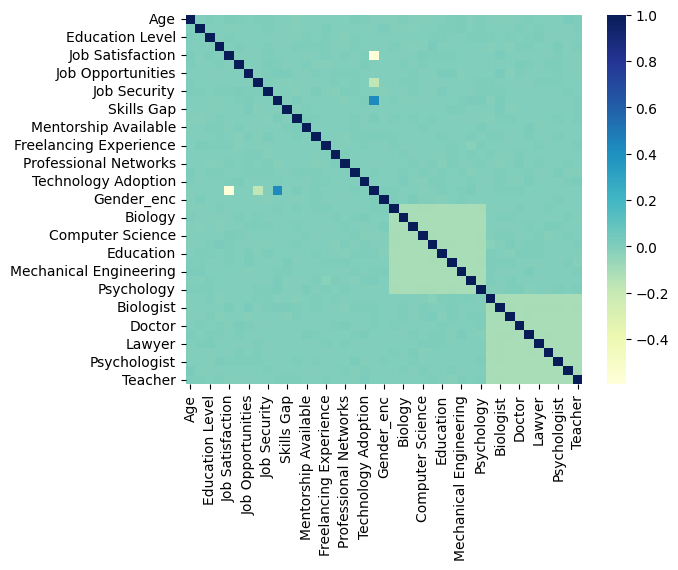

In [354]:
import seaborn as sns
sns.heatmap(career_corr, cmap = 'YlGnBu')

Text(0, 0.5, 'frequency')

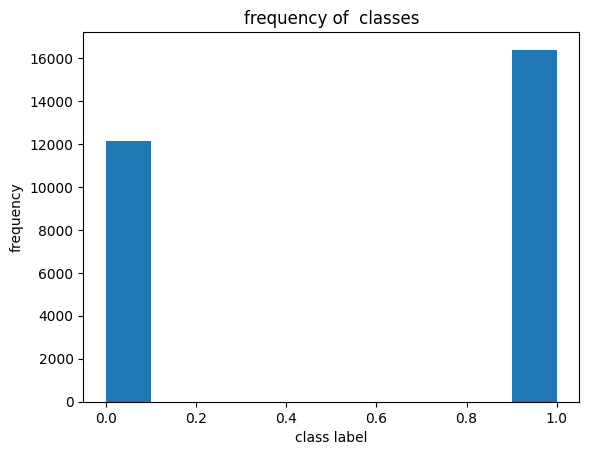

In [355]:
fig,ax = plt.subplots()
ax.hist(career['Likely to Change Occupation'])
ax.set_title('frequency of  classes')
ax.set_xlabel('class label')
ax.set_ylabel('frequency')

 **Splitting Data**






In [356]:
career.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28519 entries, 0 to 38443
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          28519 non-null  float64
 1   Years of Experience          28519 non-null  int64  
 2   Education Level              28519 non-null  int64  
 3   Industry Growth Rate         28519 non-null  int64  
 4   Job Satisfaction             28519 non-null  int64  
 5   Work-Life Balance            28519 non-null  int64  
 6   Job Opportunities            28519 non-null  int64  
 7   Salary                       28519 non-null  int64  
 8   Job Security                 28519 non-null  int64  
 9   Career Change Interest       28519 non-null  int64  
 10  Skills Gap                   28519 non-null  int64  
 11  Family Influence             28519 non-null  int64  
 12  Mentorship Available         28519 non-null  int64  
 13  Certifications       

In [357]:
from sklearn.model_selection import train_test_split
features = career[['Age', 'Years of Experience', 'Education Level', 'Industry Growth Rate', 'Job Satisfaction', 'Work-Life Balance', 'Job Opportunities', 'Salary', 'Job Security', 'Career Change Interest', 'Skills Gap', 'Family Influence', 'Mentorship Available', 'Certifications', 'Freelancing Experience', 'Geographic Mobility', 'Professional Networks', 'Career Change Events', 'Technology Adoption', 'Gender_enc', 'Arts', 'Biology', 'Business', 'Computer Science', 'Economics', 'Education', 'Law', 'Mechanical Engineering', 'Medicine', 'Psychology', 'Artist', 'Biologist', 'Business Analyst', 'Doctor', 'Economist', 'Lawyer', 'Mechanical Engineer', 'Psychologist', 'Software Developer', 'Teacher' ]]
target= career[['Likely to Change Occupation']]


In [358]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.30, random_state=0, stratify = target)

Text(0, 0.5, 'no of flowers')

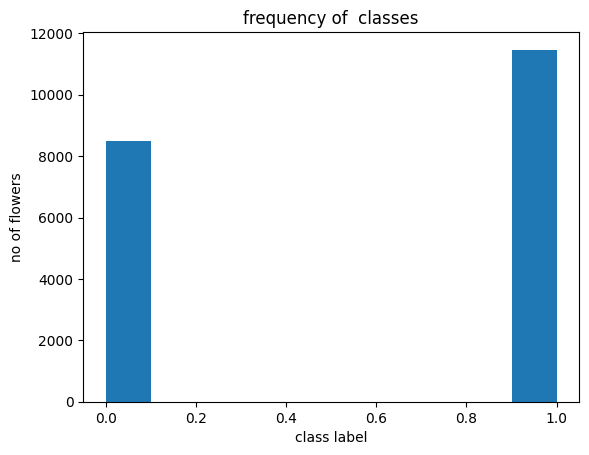

In [359]:
fig, ax = plt.subplots()
ax.hist(y_train)
ax.set_title('frequency of  classes')
ax.set_xlabel('class label')
ax.set_ylabel('no of flowers')

**Feature Scaling**

In [360]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train)

MinMaxScaler()

In [361]:
# transform data
X_train_scaled = scaler.transform(X_train)

**KNN Model**




Accuracy Before Scaling

In [362]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

knn.fit(X_train, y_train)

print("Test set accuracy: {:.2f}".format(knn.score(X_test, y_test)))

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Test set accuracy: 0.55


Accuracy After Scaling

In [363]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

knn=KNeighborsClassifier()

X_train_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)
#train
knn.fit(X_train_scaled, y_train)
y_pred=knn.predict(X_test_scaled)
# scoring on the scaled test set
accuracy1 = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(accuracy1))
print("Confusion Matrix: \n", conf_matrix)
print("Classification Report: \n", report)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Test set accuracy: 0.73
Confusion Matrix: 
 [[2657  984]
 [1308 3607]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.67      0.73      0.70      3641
           1       0.79      0.73      0.76      4915

    accuracy                           0.73      8556
   macro avg       0.73      0.73      0.73      8556
weighted avg       0.74      0.73      0.73      8556



**Logistics Regression**

In [364]:
from sklearn.linear_model import LogisticRegression

In [365]:
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
y_pred=lr.predict(X_test_scaled)
# scoring on the scaled test set
accuracy2 = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(accuracy2))
print("Confusion Matrix: \n", conf_matrix)

print("Classification Report: \n", report)

Test set accuracy: 0.90
Confusion Matrix: 
 [[3221  420]
 [ 446 4469]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.88      0.88      3641
           1       0.91      0.91      0.91      4915

    accuracy                           0.90      8556
   macro avg       0.90      0.90      0.90      8556
weighted avg       0.90      0.90      0.90      8556



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**Decision Tree**

In [366]:
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred=dt.predict(X_test)
# scoring on the scaled test set
accuracy3 = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(accuracy3))
print("Confusion Matrix: \n", conf_matrix)

print("Classification Report: \n", report)

Test set accuracy: 1.00
Confusion Matrix: 
 [[3641    0]
 [   0 4915]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3641
           1       1.00      1.00      1.00      4915

    accuracy                           1.00      8556
   macro avg       1.00      1.00      1.00      8556
weighted avg       1.00      1.00      1.00      8556



[Text(0.4, 0.875, 'x[4] <= 4.5\ngini = 0.489\nsamples = 19963\nvalue = [8495, 11468]'),
 Text(0.2, 0.625, 'gini = 0.0\nsamples = 7961\nvalue = [0, 7961]'),
 Text(0.30000000000000004, 0.75, 'True  '),
 Text(0.6, 0.625, 'x[9] <= 0.5\ngini = 0.414\nsamples = 12002\nvalue = [8495, 3507]'),
 Text(0.5, 0.75, '  False'),
 Text(0.4, 0.375, 'x[7] <= 49973.5\ngini = 0.207\nsamples = 9620\nvalue = [8495, 1125]'),
 Text(0.2, 0.125, 'gini = 0.0\nsamples = 1125\nvalue = [0, 1125]'),
 Text(0.6, 0.125, 'gini = 0.0\nsamples = 8495\nvalue = [8495, 0]'),
 Text(0.8, 0.375, 'gini = 0.0\nsamples = 2382\nvalue = [0, 2382]')]

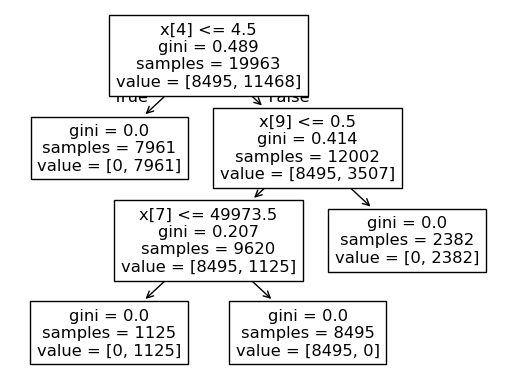

In [367]:
tree.plot_tree(dt)

**STANDARDIZED SCALING**

In [368]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled_d = scaler.fit_transform(X_train)

**Naive Bayes**

In [369]:
# preprocessing using zero mean and unit variance scaling
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# learning an SVM on the scaled training data
gnb.fit(X_train_scaled, y_train)
y_pred=gnb.predict(X_test_scaled)
# scoring on the scaled test set
accuracy4 = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(accuracy4))
print("Confusion Matrix: \n", conf_matrix)

print("Classification Report: \n", report)

Test set accuracy: 0.62
Confusion Matrix: 
 [[3641    0]
 [3213 1702]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.53      1.00      0.69      3641
           1       1.00      0.35      0.51      4915

    accuracy                           0.62      8556
   macro avg       0.77      0.67      0.60      8556
weighted avg       0.80      0.62      0.59      8556



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**COMPARISON ANALYSIS**

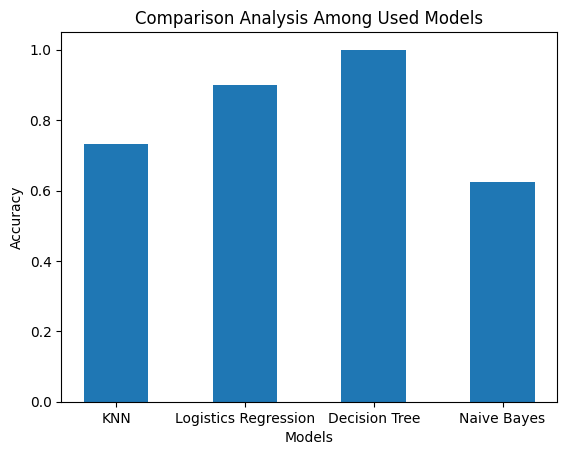

In [370]:
accuracy= [accuracy1, accuracy2, accuracy3, accuracy4]
model= ['KNN', 'Logistics Regression', 'Decision Tree', 'Naive Bayes']
plt.bar(model, accuracy, width=0.5)
plt.title('Comparison Analysis Among Used Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()